In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import tensorflow as tf
print(tf.__version__)

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

2.2.0


### Group parameters for train and test data generators

In [15]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, 
                                                             zoom_range=0.2,
                                                             rescale=1./225)
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)

train_data = train_datagen.flow_from_directory('../data/chest_xray/train/',
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='binary',
                                               color_mode='grayscale')
val_data = val_datagen.flow_from_directory('../data/chest_xray/val/',
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='binary',
                                               color_mode='grayscale')
test_data = test_datagen.flow_from_directory('../data/chest_xray/test/',
                                             target_size=(100,100),
                                             batch_size=32,
                                             class_mode='binary',
                                             color_mode='grayscale')
test_data_2 = test_datagen.flow_from_directory('../data/chest_xray/test_2/',
                                             target_size=(100,100),
                                             batch_size=32,
                                             class_mode='binary',
                                             color_mode='grayscale')

Found 4682 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 427 images belonging to 2 classes.


In [3]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

In [4]:
steps_per_epoch = len(train_data)

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(100,100,1)))
model.add(Dense(units=85, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

history = model.fit(train_data, epochs=10, validation_data=(val_data), steps_per_epoch=steps_per_epoch, validation_steps=len(val_data))

Epoch 1/10
147/147 [==============================] - 139s 943ms/step - loss: 0.5875 - accuracy: 0.7644 - precision: 0.7667 - recall: 0.9893 - val_loss: 0.6310 - val_accuracy: 0.6218 - val_precision: 0.6218 - val_recall: 1.0000
Epoch 2/10
147/147 [==============================] - 77s 525ms/step - loss: 0.3627 - accuracy: 0.8496 - precision: 0.8473 - recall: 0.9777 - val_loss: 0.4443 - val_accuracy: 0.7927 - val_precision: 0.7683 - val_recall: 0.9531
Epoch 3/10
147/147 [==============================] - 79s 536ms/step - loss: 0.3287 - accuracy: 0.8742 - precision: 0.8832 - recall: 0.9607 - val_loss: 0.3912 - val_accuracy: 0.8709 - val_precision: 0.8858 - val_recall: 0.9138
Epoch 4/10
147/147 [==============================] - 81s 552ms/step - loss: 0.3180 - accuracy: 0.8778 - precision: 0.8874 - recall: 0.9601 - val_loss: 0.3911 - val_accuracy: 0.8855 - val_precision: 0.9335 - val_recall: 0.8754
Epoch 5/10
147/147 [==============================] - 78s 533ms/step - loss: 0.3013 - accur

In [17]:
acc = model.evaluate(test_data, steps=len(test_data), verbose=1)
list(zip(model.metrics_names, acc))

20/20 [==============================] - 7s 339ms/step - loss: 0.4018 - accuracy: 0.8141 - precision: 0.7907 - recall: 0.9565


[('loss', 0.4017643928527832),
 ('accuracy', 0.8141025900840759),
 ('precision', 0.7906976938247681),
 ('recall', 0.95652174949646)]

In [16]:
acc = model.evaluate(test_data, steps=len(test_data_2), verbose=1)
list(zip(model.metrics_names, acc))

14/14 [==============================] - 5s 351ms/step - loss: 0.3863 - accuracy: 0.8415 - precision: 0.8196 - recall: 0.9571


[('loss', 0.38631200790405273),
 ('accuracy', 0.8415178656578064),
 ('precision', 0.819571852684021),
 ('recall', 0.9571428298950195)]

In [8]:
first_batch = test_data.next()
data_list = first_batch[0]
batch_index = 0
class_list = first_batch[1]
while batch_index <= test_data.batch_index:
    data = test_data.next()
    print(data[0].shape)
    data_list=np.concatenate((data_list, data[0]))
    class_list=np.concatenate((class_list, data[1]))
    batch_index = batch_index + 1
data_array = np.asarray(data_list)
data_array.shape

(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(16, 100, 100, 1)


(592, 100, 100, 1)

In [9]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in true values and predicted values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    print(classification_report(y, y_hat, target_names=['NORMAL', 'PNEUMONIA']))
    print('Accurancy: ', accuracy)
    sns.heatmap(cm,  cmap= 'Greens', annot=True)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

In [10]:
preds = model.predict_classes(data_array)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


              precision    recall  f1-score   support

      NORMAL       0.88      0.59      0.70       220
   PNEUMONIA       0.80      0.95      0.87       372

    accuracy                           0.82       592
   macro avg       0.84      0.77      0.79       592
weighted avg       0.83      0.82      0.81       592

Accurancy:  0.8175675675675675


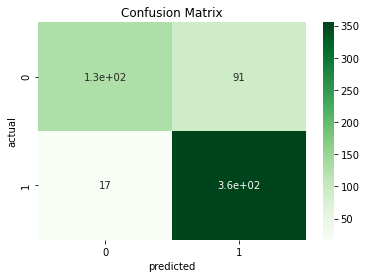

In [11]:
evaluation(class_list, preds)

In [12]:
plt.style.use('fivethirtyeight')

In [11]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

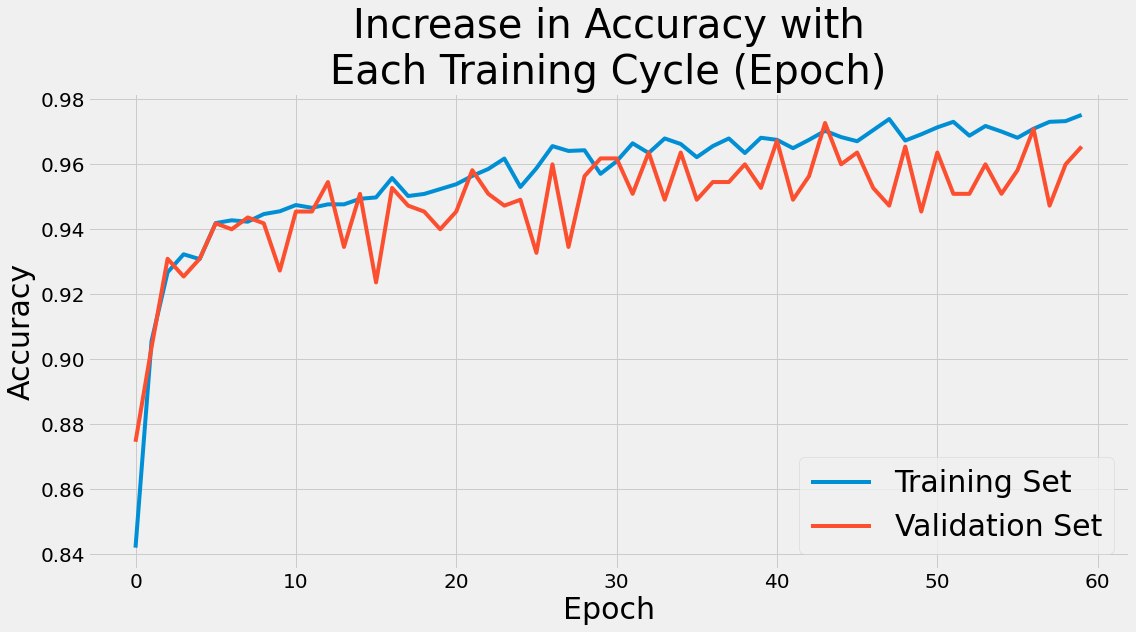

In [55]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

sns.lineplot(range(len(accuracy)), accuracy, ax=ax, label='Training Set')
# sns.lineplot(range(len(loss)), loss, ax=ax[1])

sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax[1])

ax.set_title("Increase in Accuracy with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
ax.legend(loc='lower right', fontsize=30)
plt.tight_layout()

plt.savefig('accuracy_with_val.png', transparency=True)

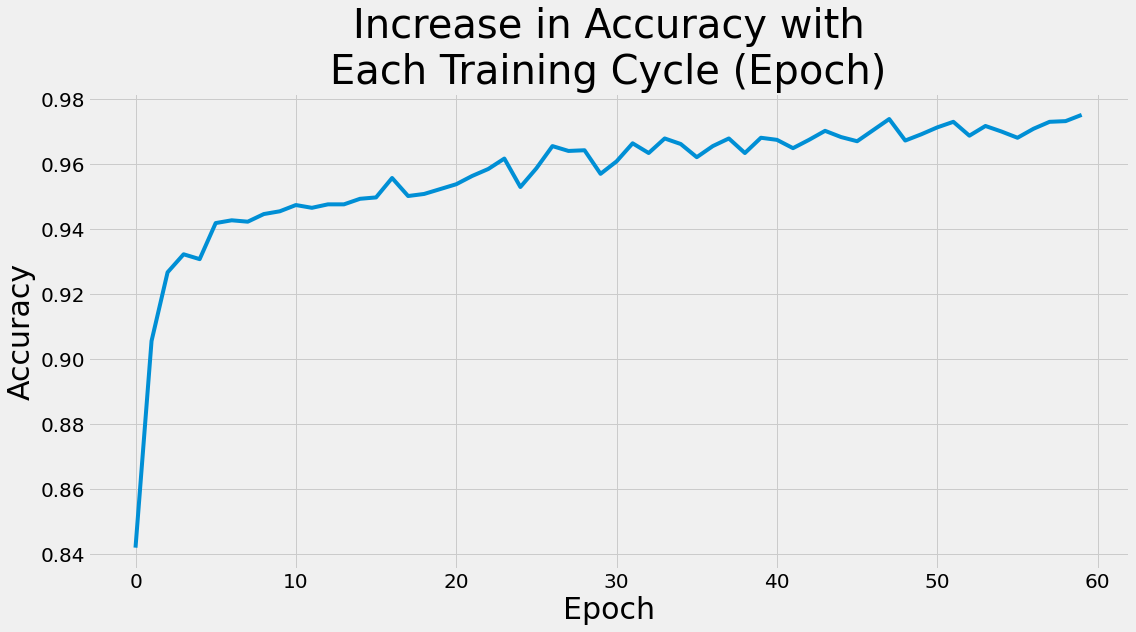

In [56]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
# sns.lineplot(range(len(loss)), loss, ax=ax[1])

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax[1])

ax.set_title("Increase in Accuracy with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
# ax.legend(loc='lower right', fontsize=30)
plt.tight_layout()

plt.savefig('accuracy.png', transparency=True)

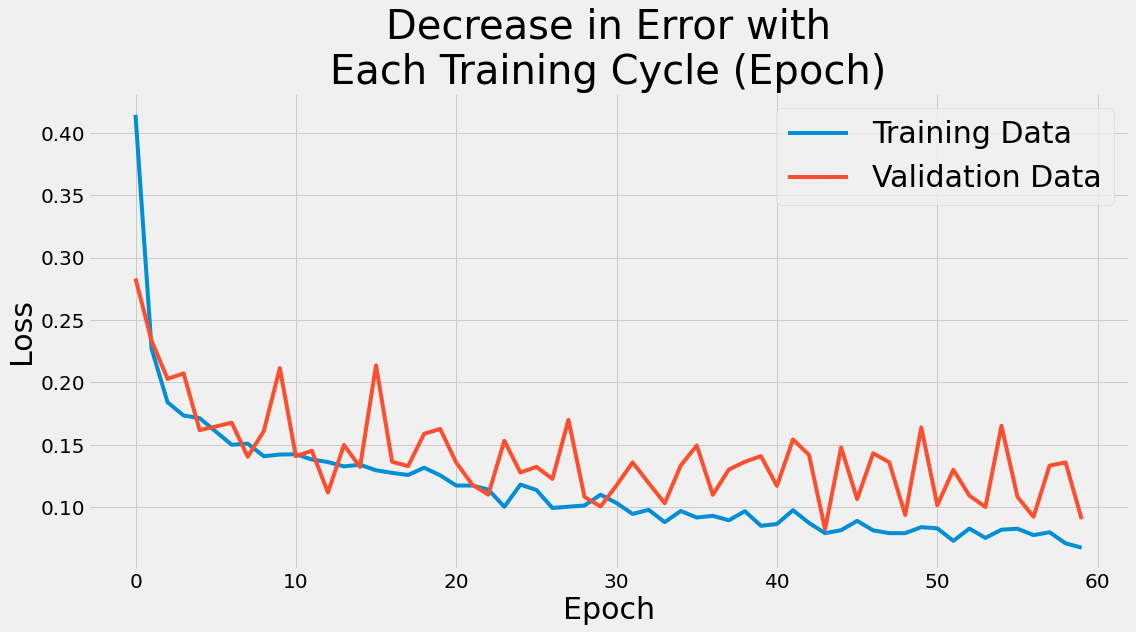

In [57]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

# sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
sns.lineplot(range(len(loss)), loss, ax=ax, label='Training Data')

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
sns.lineplot(range(len(val_loss)), val_loss, ax=ax, label='Validation Data')

ax.set_title("Decrease in Error with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Loss', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
ax.legend(loc='upper right', fontsize=30)
plt.tight_layout()

plt.savefig('loss_with_val.png', transparency=True)

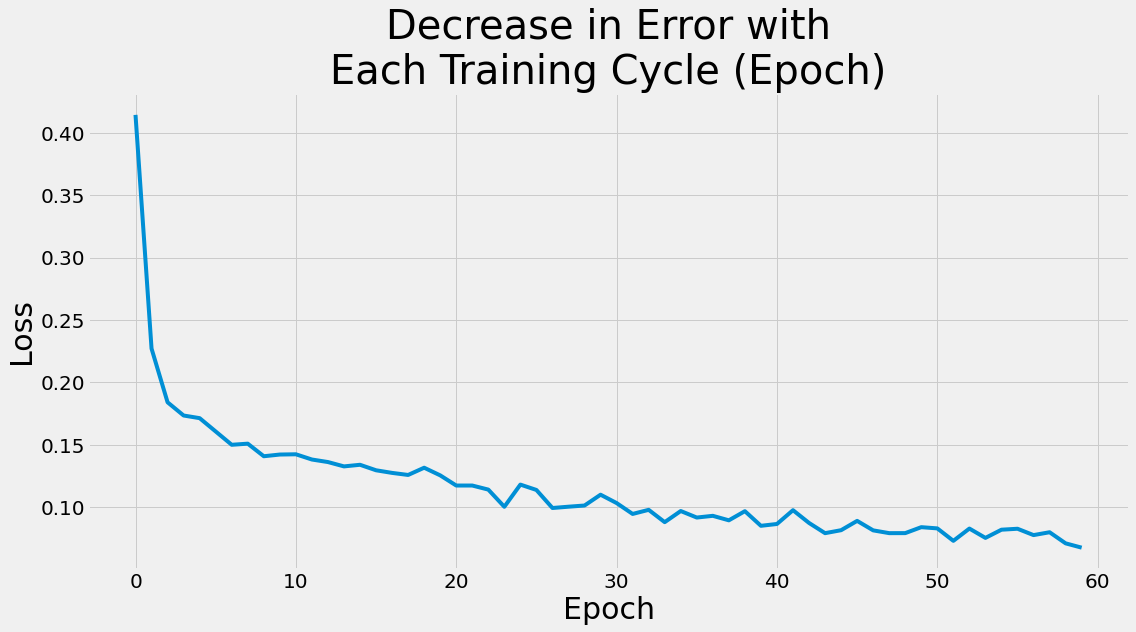

In [58]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

# sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
sns.lineplot(range(len(loss)), loss, ax=ax)

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax, label='Validation Data')

ax.set_title("Decrease in Error with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Loss', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
# ax.legend(loc='upper right', fontsize=30)
plt.tight_layout()

plt.savefig('loss.png', transparency=True)